In [7]:
import matplotlib.pyplot as plt 


# import PyPore3D wrappers that will be used in the current notebook
import pypore3d
from pypore3d import *
from pypore3d.p3dFiltPy import *
from pypore3d.p3dBlobPy import *
from pypore3d.p3dSkelPy import *
from poreUtils import *


from skimage.measure import label, regionprops, regionprops_table

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

from scipy import ndimage as nd

import porespy as ps

In [ ]:
data_dir = 'D:\\sagar\\Data\\MD_1264_A1_1_Z3.3mm\\selected_roi\\'

In [2]:
# raw_file = os.path.join(data_dir, '0-300x1200-1500x2000-2300_8bit.raw')
raw_file = "D:\\mpi_pc\\sagar\\Data\\MD_1264_A1_1_Z3.3mm\\result\\0-300x600-900x1400-1700_8bit.raw"

In [3]:
x = 300
y = 300
z = 300

volObj = py_p3dReadRaw8(raw_file, dimx=x, dimy=y, dimz=z)

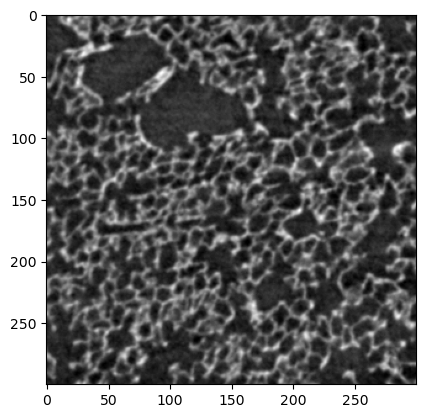

In [4]:
# Visualize a slice of the loaded volume  
vol = swigObjt2uint8Array(volObj, x, y, z, plot=True)

In [5]:
vol.shape

(300, 300, 300)

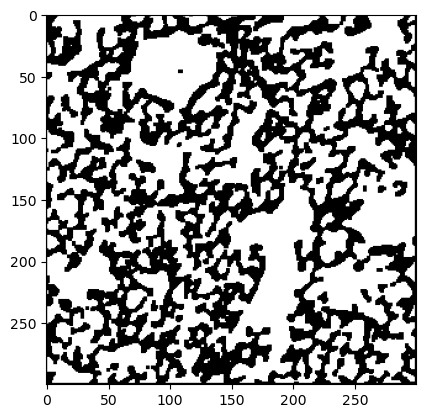

In [8]:
th_vol = vol < 55
th_vol = nd.binary_closing(th_vol, np.ones((3,3,3)))
th_vol = th_vol.astype(np.uint8)
plt.imshow(th_vol[100, :, :], cmap='gray')

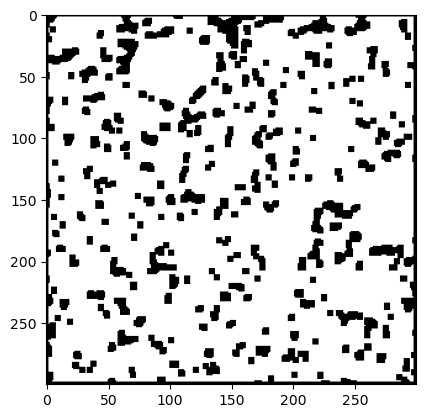

In [9]:
th_vol = nd.binary_dilation(th_vol, np.ones((5,5,5)))
th_vol = nd.binary_erosion(th_vol, np.ones((5,5,5)))
plt.imshow(th_vol[100, :, :], cmap='gray')

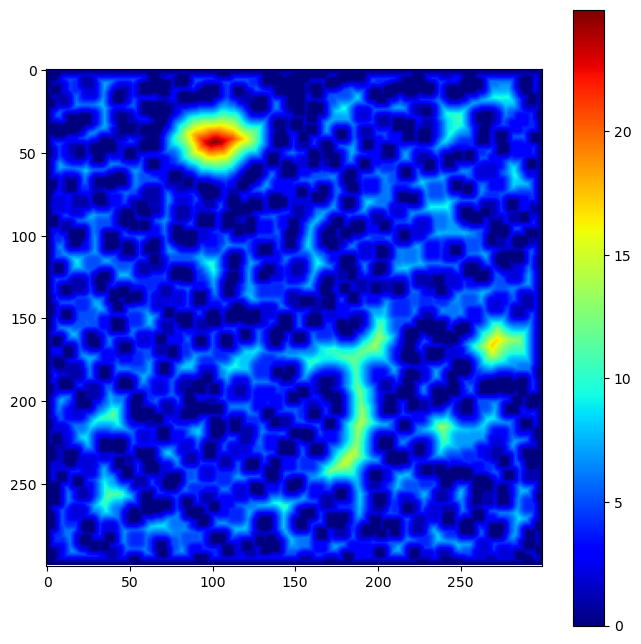

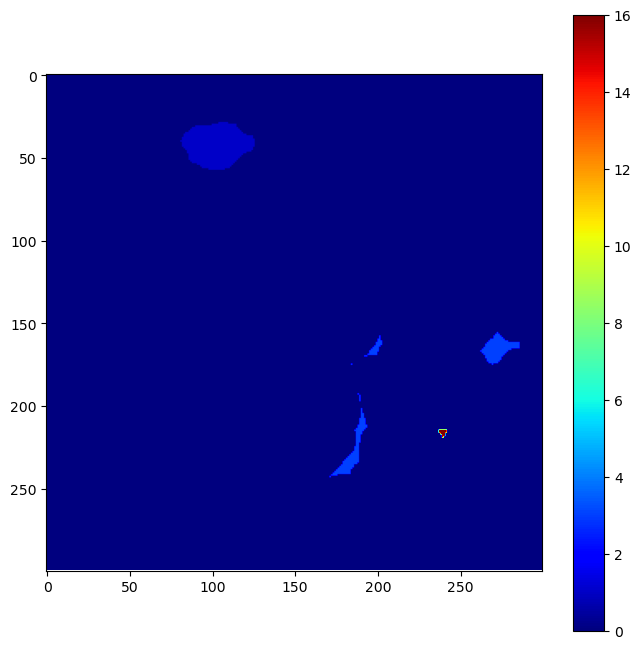

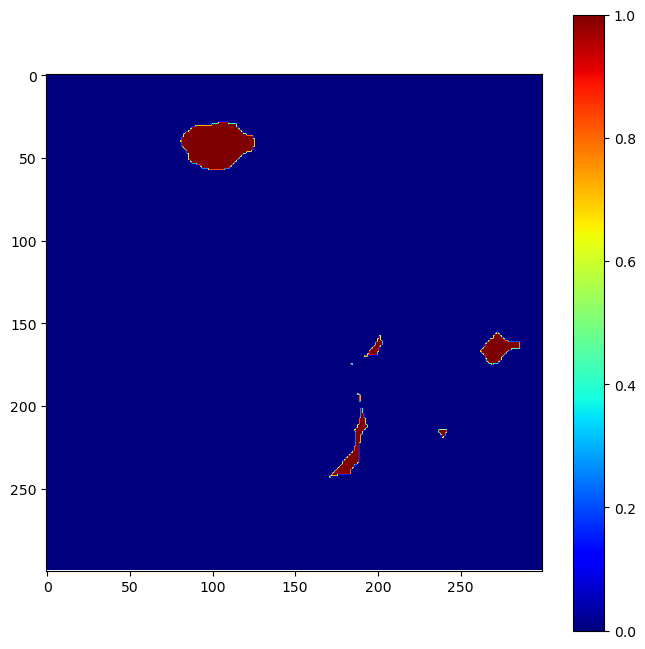

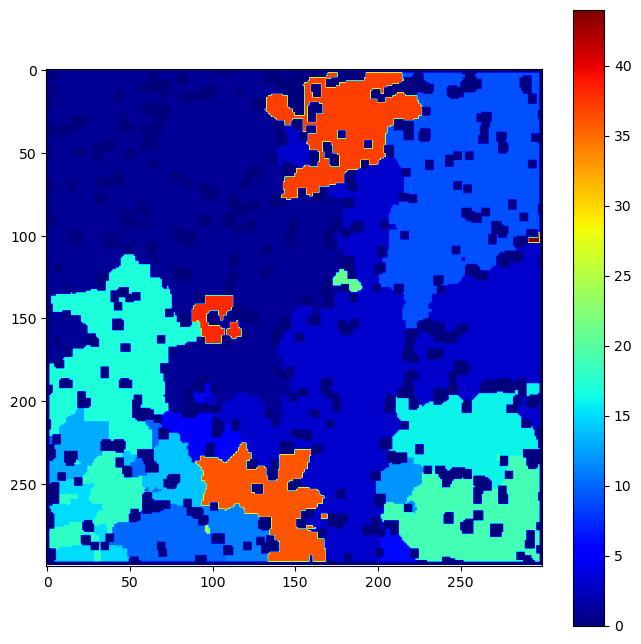

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86]


In [10]:
dt3d = nd.distance_transform_edt(th_vol)
# coords = peak_local_max(dt, footprint=np.ones((3, 3)), labels=th_img)
# mask = np.zeros(dt.shape, dtype=bool)
# mask[tuple(coords.T)] = True

mask = dt3d > 12
markers = label(mask)
labels = watershed(-dt3d, markers, mask=th_vol)

fig = plt.figure(figsize=(8,8))
plt.imshow(dt3d[100, :, :], cmap='jet')
plt.colorbar()
plt.show()

fig = plt.figure(figsize=(8,8))
plt.imshow(markers[100, :, :], cmap='jet')
plt.colorbar()
plt.show()

fig = plt.figure(figsize=(8,8))
plt.imshow(mask[100, :, :], cmap='jet')
plt.colorbar()
plt.show()

fig = plt.figure(figsize=(8,8))
plt.imshow(labels[100, :, :], cmap='jet')
plt.colorbar()
plt.show()

print(np.unique(labels))

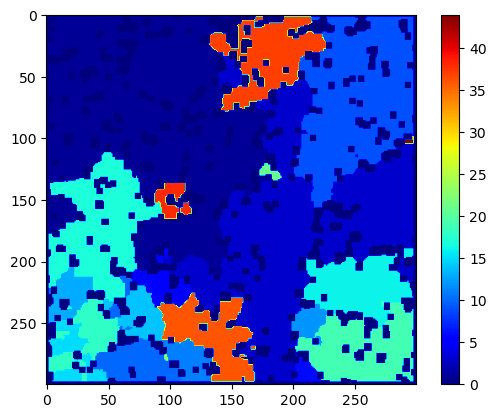

In [11]:
%matplotlib inline
plt.imshow(labels[100, :, :], cmap='jet')
plt.colorbar()
plt.show()

In [12]:
# Using porespy 
import porespy as ps
import scipy.ndimage as spim
ps.visualization.set_mpl_style()
np.random.seed(1)

In [13]:
props = ps.metrics.regionprops_3D(labels)

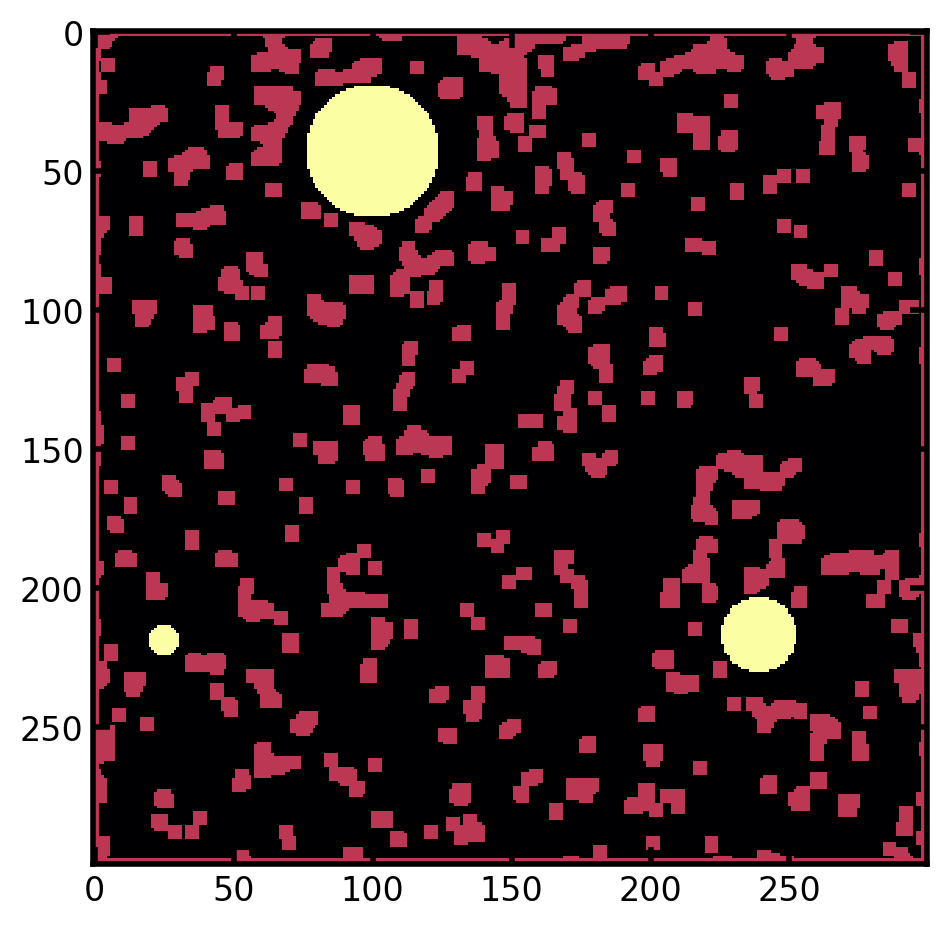

In [14]:
# Create an image of maximally inscribed spheres
sph = ps.metrics.prop_to_image(regionprops=props, shape=vol.shape, prop='inscribed_sphere')
fig, ax = plt.subplots()
ax.imshow(sph[100, :, :] + 0.5*(~th_vol[100, :, :]) , cmap=plt.cm.inferno);